In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from normalization import min_max
from map_generator import generate_map
from grader import grader

In [2]:
dataframe = pd.read_csv('star_classification.csv')

In [3]:
dataframe.head()
dataframe = dataframe.drop(dataframe[dataframe['u'] <-1000].index)

    obj_ID = Object Identifier, the unique value that identifies the object in the image catalog used by the CAS
    alpha = Right Ascension angle (at J2000 epoch)
    delta = Declination angle (at J2000 epoch)
    u = Ultraviolet filter in the photometric system
    g = Green filter in the photometric system
    r = Red filter in the photometric system
    i = Near Infrared filter in the photometric system
    z = Infrared filter in the photometric system
    run_ID = Run Number used to identify the specific scan
    rereun_ID = Rerun Number to specify how the image was processed
    cam_col = Camera column to identify the scanline within the run
    field_ID = Field number to identify each field
    spec_obj_ID = Unique ID used for optical spectroscopic objects (this means that 2 different observations with the same spec_obj_ID must share the output class)
    class = object class (galaxy, star or quasar object)
    redshift = redshift value based on the increase in wavelength
    plate = plate ID, identifies each plate in SDSS
    MJD = Modified Julian Date, used to indicate when a given piece of SDSS data was taken
    fiber_ID = fiber ID that identifies the fiber that pointed the light at the focal plane in each observation


In [4]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
Index: 99999 entries, 0 to 99999
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   obj_ID       99999 non-null  float64
 1   alpha        99999 non-null  float64
 2   delta        99999 non-null  float64
 3   u            99999 non-null  float64
 4   g            99999 non-null  float64
 5   r            99999 non-null  float64
 6   i            99999 non-null  float64
 7   z            99999 non-null  float64
 8   run_ID       99999 non-null  int64  
 9   rerun_ID     99999 non-null  int64  
 10  cam_col      99999 non-null  int64  
 11  field_ID     99999 non-null  int64  
 12  spec_obj_ID  99999 non-null  float64
 13  class        99999 non-null  object 
 14  redshift     99999 non-null  float64
 15  plate        99999 non-null  int64  
 16  MJD          99999 non-null  int64  
 17  fiber_ID     99999 non-null  int64  
dtypes: float64(10), int64(7), object(1)
memory usage: 1

In [5]:
print(dataframe.describe())

             obj_ID         alpha         delta             u             g  \
count  9.999900e+04  99999.000000  99999.000000  99999.000000  99999.000000   
mean   1.237665e+18    177.628653     24.135552     22.080679     20.631583   
std    8.438450e+12     96.502612     19.644608      2.251068      2.037384   
min    1.237646e+18      0.005528    -18.785328     10.996230     10.498200   
25%    1.237659e+18    127.517698      5.147477     20.352410     18.965240   
50%    1.237663e+18    180.900527     23.646462     22.179140     21.099930   
75%    1.237668e+18    233.895005     39.901582     23.687480     22.123775   
max    1.237681e+18    359.999810     83.000519     32.781390     31.602240   

                  r             i             z        run_ID  rerun_ID  \
count  99999.000000  99999.000000  99999.000000  99999.000000   99999.0   
mean      19.645777     19.084865     18.768988   4481.403354     301.0   
std        1.854763      1.757900      1.765982   1964.739021  

In [6]:
# Extract target and features from dataframe
label_searched = 'class'
labels_for_mapping =[]
labels_for_normalisation  = ['u', 'g', 'r', 'i', 'z','redshift'] #93.26% , 


y = dataframe[[label_searched]]
x = dataframe[labels_for_mapping+ labels_for_normalisation]
solution_map=generate_map(y[label_searched])


data_map = {}
for label in labels_for_mapping:
    data_map[label]=  generate_map(x[label])
for data in data_map:
    x.loc[:, data] = x[data].replace(data_map[data])

x_normalised= min_max(x[labels_for_normalisation].values.tolist(),labels_for_normalisation, nan_as_zero=True )
x_norm=pd.DataFrame(x_normalised)
y_mapped=y.replace(solution_map)
x_norm=pd.DataFrame(x_normalised)

/tmp/ipykernel_4916/4036457533.py:20: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  y_mapped=y.replace(solution_map)


In [7]:
solution_map

{'GALAXY': 0, 'QSO': 1, 'STAR': 2}

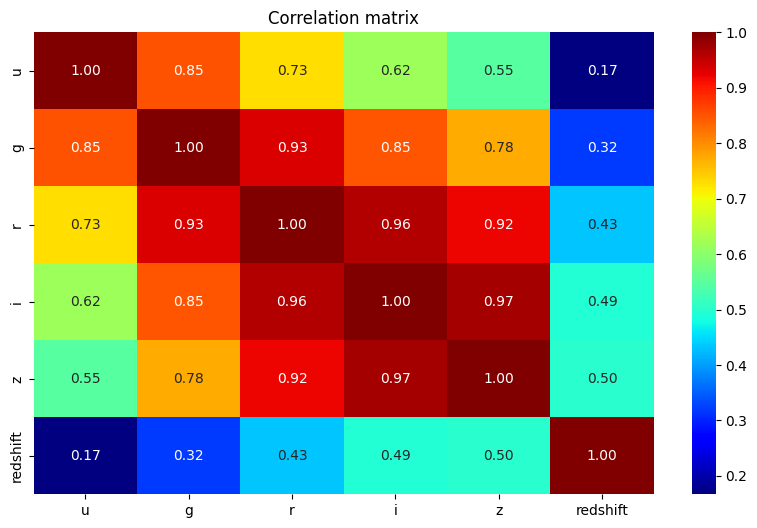

In [8]:
plt.figure(figsize=(10,6))
correlation = pd.concat([x_norm,y_mapped],axis=1)
sns.heatmap(x_norm.corr(), annot=True,cmap='jet',fmt='.2f') #jet,copper, coolwarm
plt.title('Correlation matrix')
plt.show()

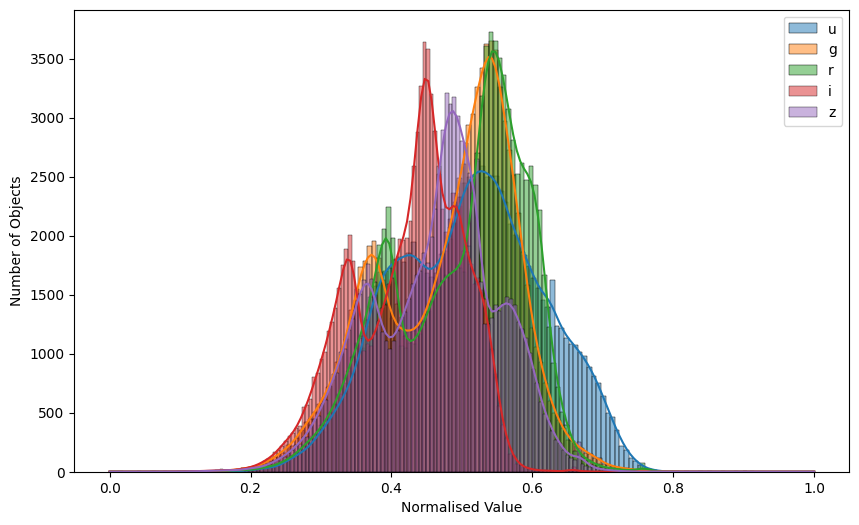

In [9]:
plt.figure(figsize=(10, 6))
histo = x_norm.drop(columns=['redshift'])
for column in histo.columns:
    sns.histplot(histo[column], kde=True, label=column)

plt.xlabel('Normalised Value')
plt.ylabel('Number of Objects')
plt.legend()
plt.show()


In [10]:

x.describe()

,u,g,r,i,z,redshift
count,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000
mean,22.080679,20.631583,19.645777,19.084865,18.768988,0.576667
std,2.251068,2.037384,1.854763,1.757900,1.765982,0.730709
min,10.996230,10.498200,9.822070,9.469903,9.612333,-0.009971
25%,20.352410,18.965240,18.135795,17.732280,17.460830,0.054522
50%,22.179140,21.099930,20.125310,19.405150,19.004600,0.424176
75%,23.687480,22.123775,21.044790,20.396510,19.921120,0.704172
max,32.781390,31.602240,29.571860,32.141470,29.383740,7.011245


In [11]:
y['class'].value_counts()

class
GALAXY    59445
STAR      21593
QSO       18961
Name: count, dtype: int64

I will try oversampling to ensure underrepresentation of QSOs and stars.

In [12]:
x_norm

,u,g,r,i,z,redshift
0,0.591347,0.558050,0.535344,0.427665,0.464377,0.091831
1,0.632603,0.584423,0.646203,0.515986,0.607035,0.112389
2,0.654888,0.576463,0.546218,0.435729,0.472194,0.093170
3,0.511384,0.629186,0.596946,0.486717,0.487460,0.134210
4,0.387463,0.335579,0.337999,0.287021,0.300043,0.017959
...,...,...,...,...,...,...
99994,0.512797,0.591245,0.611752,0.522045,0.562598,0.001420
99995,0.536831,0.563308,0.538130,0.453770,0.495813,0.059087
99996,0.466966,0.415644,0.424420,0.362588,0.391468,0.021839
99997,0.658896,0.527831,0.510982,0.423554,0.455834,0.066229


In [13]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_norm, y_mapped, test_size=0.2, random_state = 10)
print(y_test.value_counts())
print(y_train.value_counts())

class
0        11869
2         4296
1         3835
Name: count, dtype: int64
class
0        47576
2        17297
1        15126
Name: count, dtype: int64


In [14]:
from bestNeighborsNumber import findBestNeighboursNumber
max_number_of_neighbours = 60
max_index, solutions = findBestNeighboursNumber(x_train, x_test, y_train, y_test, max_number_of_neighbours)

1/60
2/60
3/60
4/60
5/60
6/60
7/60
8/60
9/60
10/60
11/60
12/60
13/60
14/60
15/60
16/60
17/60
18/60
19/60
20/60
21/60
22/60
23/60
24/60
25/60
26/60
27/60
28/60
29/60
30/60
31/60
32/60
33/60
34/60
35/60
36/60
37/60
38/60
39/60
40/60
41/60
42/60
43/60
44/60
45/60
46/60
47/60
48/60
49/60
50/60
51/60
52/60
53/60
54/60
55/60
56/60
57/60
58/60
59/60


Best solution is for k = 3 and achieved score of 96.465 %


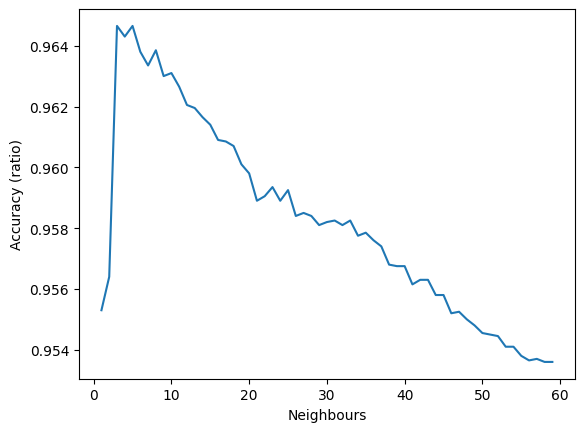

In [15]:
plt.plot(range(1,max_number_of_neighbours ),solutions)
plt.xlabel("Neighbours")
plt.ylabel('Accuracy (ratio)')
print(f"Best solution is for k = {max_index+1} and achieved score of {solutions[max_index]*100} %")


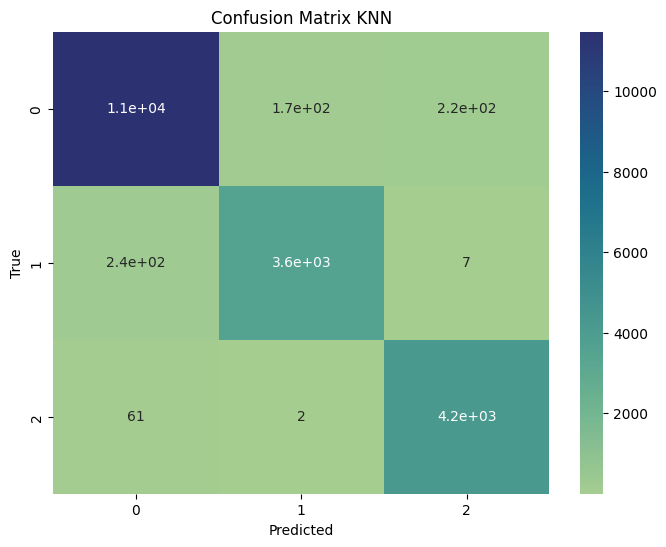

In [16]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
import numpy as np
knn_lib=KNeighborsClassifier(max_index+1)
knn_lib.fit(x_train,y_train.values.ravel())
y_pred=knn_lib.predict(x_test)
confusion_KNN = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_KNN,annot=True, cmap="crest", xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix KNN')
plt.show()

In [17]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
# Prepare a function for mode evaluation
def evaluate_model(clf):
    clf.fit(x_train, y_train)
    return clf.score(x_test, y_test)

def classification(trainSamples, trainLabels, testSamples, testLabels):
    models = {
        "Random forest": RandomForestClassifier(max_depth=10, random_state=42, n_estimators=100),
        "Decision tree": DecisionTreeClassifier(max_depth=20, random_state=42),
        "Naive Bayes": GaussianNB()
    }
    for model, clf in models.items():
        score = evaluate_model(clf)
        print("{}: {}".format(model, score))
classification(x_train, y_train.values.ravel(), x_test, y_test)

/home/radek/.local/lib/python3.10/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Random forest: 0.9751
Decision tree: 0.9678
Naive Bayes: 0.92105


/home/radek/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


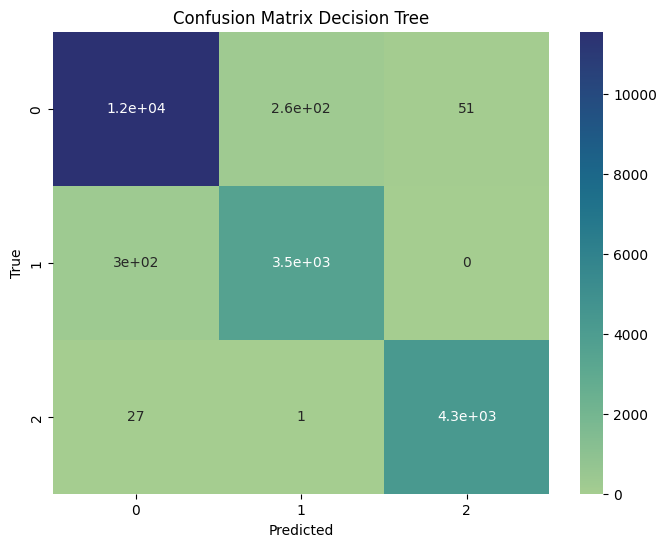

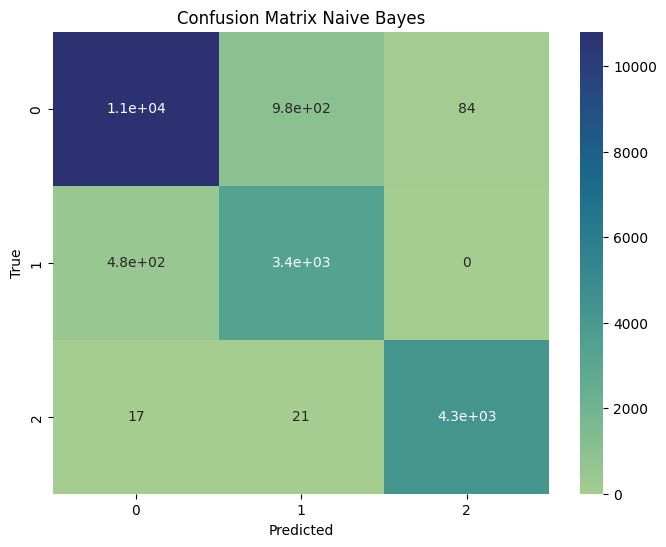

In [18]:
DTC = DecisionTreeClassifier(max_depth=20, random_state=42)
DTC.fit(x_train, y_train.values.ravel())
y_pred_tree=DTC.predict(x_test)
GNB= GaussianNB()
GNB.fit(x_train, y_train.values.ravel())
y_pred_gaussian=GNB.predict(x_test)

confusion_tree = confusion_matrix(y_test, y_pred_tree)
confusion_gausian = confusion_matrix(y_test, y_pred_gaussian)

plt.figure(figsize=(8, 6))
sns.heatmap(confusion_tree,annot=True,cmap="crest", xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix Decision Tree')
plt.show()

plt.figure(figsize=(8, 6))
sns.heatmap(confusion_gausian,annot=True, cmap="crest",xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix Naive Bayes')
plt.show()

In [19]:
from sklearn.model_selection import cross_val_score

# get the 3 best performing models
best_models = {
    "Random forest": RandomForestClassifier(max_depth=10, random_state=21, n_estimators=100),
    "MLP classifier": MLPClassifier(alpha=1e-5, hidden_layer_sizes=(50, 25), random_state=42, max_iter=1000),
    "Decision tree": DecisionTreeClassifier(max_depth=20, random_state=42),
}

# perform cross validation
for model, clf in best_models.items():
    scores = cross_val_score(clf, x_norm, y_mapped, cv=5)
    print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

/home/radek/.local/lib/python3.10/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/home/radek/.local/lib/python3.10/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/home/radek/.local/lib/python3.10/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/home/radek/.local/lib/python3.10/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y 

0.97 accuracy with a standard deviation of 0.00


/home/radek/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1101: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/radek/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1101: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/radek/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1101: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/radek/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1101: DataConversionWarning

0.97 accuracy with a standard deviation of 0.00
0.97 accuracy with a standard deviation of 0.00


In [20]:
from sklearn.feature_selection import SelectKBest, f_classif, f_regression
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import normalize
from sklearn.utils import class_weight

def feature_selection(samples, labels):
    samples = SelectKBest(k=2).fit_transform(samples, labels)
#     samples = normalize(samples)
    return samples

newSamples = feature_selection(x_norm, y_mapped)
# perform cross validation
for model, clf in best_models.items():
    scores = cross_val_score(clf, newSamples, y_mapped, cv=5)
    print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

/home/radek/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/radek/.local/lib/python3.10/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/home/radek/.local/lib/python3.10/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/home/radek/.local/lib/python3.10/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to

0.95 accuracy with a standard deviation of 0.00


/home/radek/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1101: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/radek/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1101: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/radek/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1101: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/radek/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1101: DataConversionWarning

0.95 accuracy with a standard deviation of 0.00
0.93 accuracy with a standard deviation of 0.00
